In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
baseline = pd.read_csv('baseline_532.csv')
baseline.sample(5)

,Time_Seconds,Best_Fitness
3106,18535.53,43714.0
1260,7544.72,45503.0
4396,26216.78,43599.0
5496,32777.68,43529.0
5442,32456.80,43529.0


In [7]:
actual = pd.read_csv('TSP_att532.csv', header=None, names=["Time_Seconds", "Best_Fitness"])
actual.sample(5)

,Time_Seconds,Best_Fitness
7391,37306.047805,84119
4560,23019.976861,99856
4043,20410.822522,101655
5862,29590.245793,95555
4309,21753.188507,100264


In [14]:
actual_short = actual[:60000//5]

In [20]:
for i in range(len(actual_short)):
    actual_short.at[i, 'Time_Seconds'] = (i+1)*5

In [22]:
actual_short.tail()

,Time_Seconds,Best_Fitness
11995,59980.0,74964
11996,59985.0,74964
11997,59990.0,74964
11998,59995.0,74964
11999,60000.0,74964


In [24]:
for i in range(len(baseline)):
    baseline.at[i, 'Time_Seconds'] = (i+1)*5

In [33]:
best_fitness = baseline.at[len(baseline)-1, 'Best_Fitness']
timeList = list(range(len(baseline)*5 + 5, 60005, 5))
bfList = [ best_fitness for _ in timeList ]
print(len(timeList))
print(len(bfList))
print(len(baseline))
print(len(actual_short))

6026
6026
5974
12000


In [34]:
baseline_app = pd.concat([baseline, pd.DataFrame({"Time_Seconds": timeList, "Best_Fitness": best_fitness})])
baseline_app.tail()

,Time_Seconds,Best_Fitness
6021,59980.0,43529.0
6022,59985.0,43529.0
6023,59990.0,43529.0
6024,59995.0,43529.0
6025,60000.0,43529.0


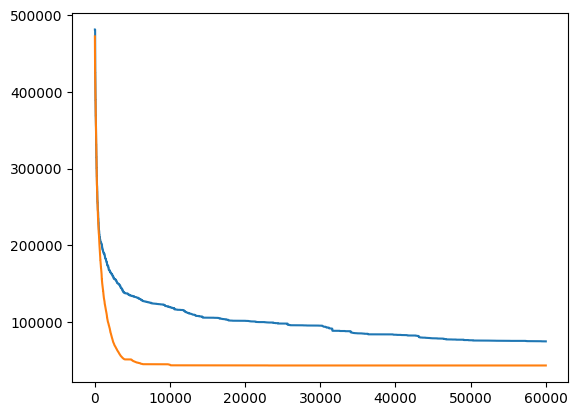

In [35]:
plt.plot(actual_short.Time_Seconds, actual_short.Best_Fitness)
plt.plot(baseline_app.Time_Seconds, baseline_app.Best_Fitness)

In [36]:
actual_short[::4].to_csv('tsp_532_actual.dat', sep=' ')
baseline_app[::4].to_csv('tsp_532_baseline.dat', sep = ' ')